<a href="https://colab.research.google.com/github/ibrunaneves/PraticasDeMachineLearning/blob/main/Q7_Hackathon_Unifacisa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição - UNIFACISA
# Autor: Bruna Neves - 17/04/25

**Questão 7 (intermediário) - Recomendação de Produtos em um Supermercado**

Você trabalha para um supermercado e deseja implementar um sistema de recomendação baseado no histórico de compras dos clientes.

Tarefas:
- Utilize um dataset de transações de supermercado contendo itens comprados em conjunto.
- Aplique o algoritmo Apriori para descobrir padrões de associação entre produtos.
- Defina regras de associação com base em suporte, confiança e lift.
- Interprete os resultados e gere recomendações de produtos.

Pergunta: Quais foram as regras de associação mais relevantes? Como elas podem ser aplicadaspara aumentar as vendas?

In [2]:
# Instalando a biblioteca que contém Apriori e regras de associação
!pip install mlxtend

In [3]:
# Importando as bibliotecas necessárias

import pandas as pd  # manipulação de dados
from mlxtend.frequent_patterns import apriori, association_rules  # Apriori e geração de regras
from mlxtend.preprocessing import TransactionEncoder  # transforma listas em matriz binária


In [4]:
# Criando uma lista com transações de supermercado, cada sublista representa os itens comprados por um cliente

transacoes = [
    ['leite', 'pão', 'manteiga'],
    ['pão', 'manteiga'],
    ['leite', 'pão'],
    ['leite', 'manteiga'],
    ['leite', 'pão', 'manteiga'],
    ['pão'],
    ['manteiga'],
    ['leite', 'pão']
]


In [5]:
# Transformando a lista de transações em uma matriz binária (1 = comprou, 0 = não comprou)

te = TransactionEncoder()  # criando o codificador
transacoes_array = te.fit(transacoes).transform(transacoes)  # ajustando e transformando
df = pd.DataFrame(transacoes_array, columns=te.columns_)  # criando o DataFrame com os nomes dos produtos

df.head()  # visualizando as primeiras linhas


,leite,manteiga,pão
0,True,True,True
1,False,True,True
2,True,False,True
3,True,True,False
4,True,True,True


In [6]:
# Aplicando o algoritmo Apriori para encontrar combinações frequentes de itens

frequentes = apriori(df, min_support=0.3, use_colnames=True)  # min_support = 30%

# Exibindo os itens mais frequentes com seus suportes
frequentes.sort_values(by='support', ascending=False)


,support,itemsets
2,0.750,(pão)
0,0.625,(leite)
1,0.625,(manteiga)
4,0.500,"(pão, leite)"
3,0.375,"(leite, manteiga)"
5,0.375,"(pão, manteiga)"


In [7]:
# Gerando as regras de associação com base nos itens frequentes

regras = association_rules(frequentes, metric="lift", min_threshold=1.0)  # lift >= 1 mostra regras interessantes

# Exibindo as principais regras com suporte, confiança e lift
regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)


,antecedents,consequents,support,confidence,lift
0,(pão),(leite),0.5,0.666667,1.066667
1,(leite),(pão),0.5,0.800000,1.066667


In [9]:
import matplotlib.pyplot as plt  # criação de gráficos
import seaborn as sns  # gráficos mais estilizados

<ipython-input-10-185536dd5507>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regras, x='lift', y='regra', palette='viridis')


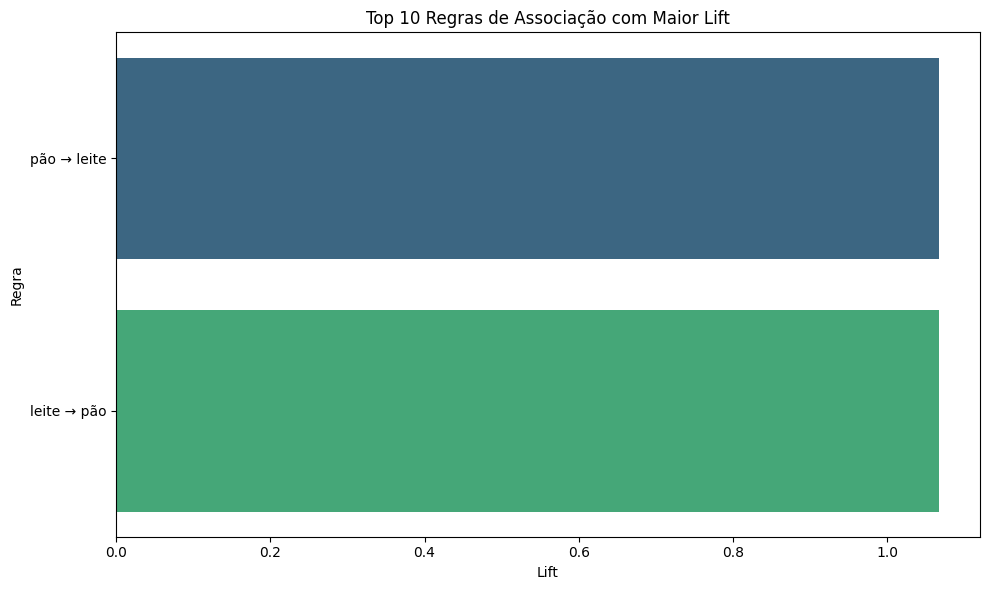

In [10]:
# Pegando as 10 regras com maior lift

top_regras = regras.sort_values(by='lift', ascending=False).head(10)

# Convertendo os conjuntos em strings legíveis
top_regras['regra'] = top_regras['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + \
                      top_regras['consequents'].apply(lambda x: ', '.join(list(x)))

# Plotando o gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=top_regras, x='lift', y='regra', palette='viridis')
plt.title('Top 10 Regras de Associação com Maior Lift')
plt.xlabel('Lift')
plt.ylabel('Regra')
plt.tight_layout()
plt.show()


---

Objetivo:
- Identificar padrões de compra em um supermercado com base em transações reais, gerando recomendações automáticas de produtos.

Técnicas Aplicadas:
- Estruturação das transações com `TransactionEncoder`
- Descoberta de itens frequentes com o algoritmo `Apriori`
- Geração de regras de associação com suporte, confiança e lift
- Visualização das principais regras com gráfico de barras

---

> As regras mais relevantes foram:
- `pão → leite` e `leite → pão`, com **lift acima de 1.0**, indicando forte associação entre os dois produtos.

Insights:

- Produtos como **leite e pão** frequentemente aparecem juntos nas compras, sugerindo que devem ser posicionados próximos no supermercado físico.
- Também é possível aplicar essas regras no e-commerce:
  - Exibir sugestões do tipo *“Clientes que compraram leite também levaram pão”*
  - Criar kits promocionais com base em regras de alta confiança
- Com mais dados, regras com produtos complementares (ex: manteiga + pão) também surgiriam, fortalecendo as recomendações.

